In [3]:
####WELCOME, We will be looking at a simple linear regression line today
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
##let's get our dataset
fuelConsumptionDf = pd.read_csv("C:\\Users\\fabri\\OneDrive\\Documents\\DasText\\csvFiles\\FuelConsumption.csv")
fuelConsumptionDf.head(3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


In [5]:
##great! let's just focus on the numerical categories for now though
fuelData = fuelConsumptionDf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
fuelData.head(3)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002186C384B88>,
      dtype=object)

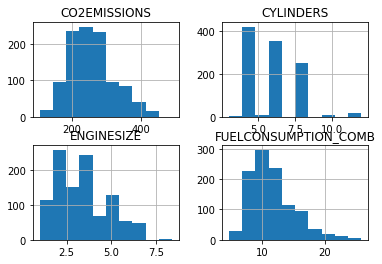

In [6]:
####let's plot this 
viz = fuelData[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']] ##select columns you want a hist of 
viz.hist()

Text(0, 0.5, 'Emission')

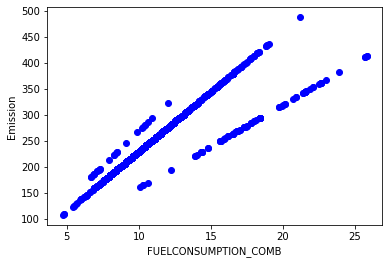

In [7]:
#combFuel v emissions
plt.scatter(fuelData.FUELCONSUMPTION_COMB, fuelData.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

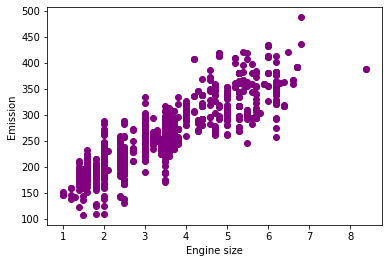

In [8]:
#engine size v emissions
plt.scatter(fuelData.ENGINESIZE, fuelData.CO2EMISSIONS,  color='purple')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

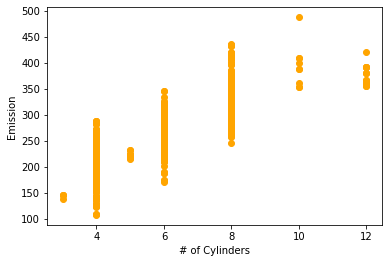

In [9]:
#cylinders v emissions
plt.scatter(fuelData.CYLINDERS, fuelData.CO2EMISSIONS,  color='orange')
plt.xlabel("# of Cylinders")
plt.ylabel("Emission")

In [10]:
####GREAT! NOW LET'S SPLIT THE DATA INTO TRAINING AND TESTING VALUES

In [11]:
##we need to create a mask to split the data in to 80% train, 20% test

msk = np.random.rand(len(fuelData)) < 0.8 #doing this assigns a "true or false" for each row 
train = fuelData[msk] #our training data will be all those "trues"
test = fuelData[~msk] #all the falses

Text(0, 0.5, 'Emission')

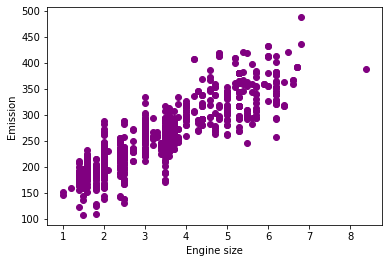

In [12]:
#now let's scatter plot the part of the data we selected as the training data! for engine size
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='purple')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [13]:
####let's make a linear regression model!
from sklearn import linear_model
regr = linear_model.LinearRegression() #makes the regression object
train_x = np.asanyarray(train[['ENGINESIZE']]) #makes the independent column into numpy array
train_y = np.asanyarray(train[['CO2EMISSIONS']]) #makes the dependent column into numpy array
regr.fit (train_x, train_y) #fits the data using the regr object

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.10224881]]
Intercept:  [125.91100418]


Text(0, 0.5, 'Emission')

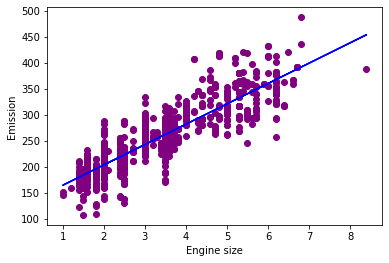

In [14]:
####PLOTTING THE FIT LINE OVER THE DATA
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='purple')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [15]:
####Evaluation

#now we must evaluate the model using evaluation metrics
## we will use MSE

#let's import r2_score
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']]) #make numpy arrays from out test set like we did for training
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x) #makes a list of predicted y's, or emissions, given x's

##some evaluation metrics:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))

##our R^2 result
print("R2-score: %.2f" % r2_score(test_y , test_y_hat) ) #how well predicted y's fall in with the tested y's

Mean absolute error: 23.83
Residual sum of squares (MSE): 886.94
R2-score: 0.78
